In [1]:
%cd simple-HRNet

c:\Users\user\Desktop\cv_homework\simple-HRNet


In [2]:
import cv2
import requests
import matplotlib.pyplot as plt
import torch
from skimage import io
from PIL import Image
from SimpleHRNet import SimpleHRNet

In [17]:
w_pth = 'pose_hrnet_w32_256x192.pth'

model = SimpleHRNet(32, 17, w_pth, yolo_version='v5', yolo_model_def='yolov5n', multiperson=True)

image_path = 'gi_EIGqXyEE.jpg'
image = io.imread(image_path)
joints = model.predict(image)

device: 'cpu'


Using cache found in C:\Users\user/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-4-19 Python-3.9.13 torch-2.2.2+cpu CPU

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients, 4.5 GFLOPs
Adding AutoShape... 


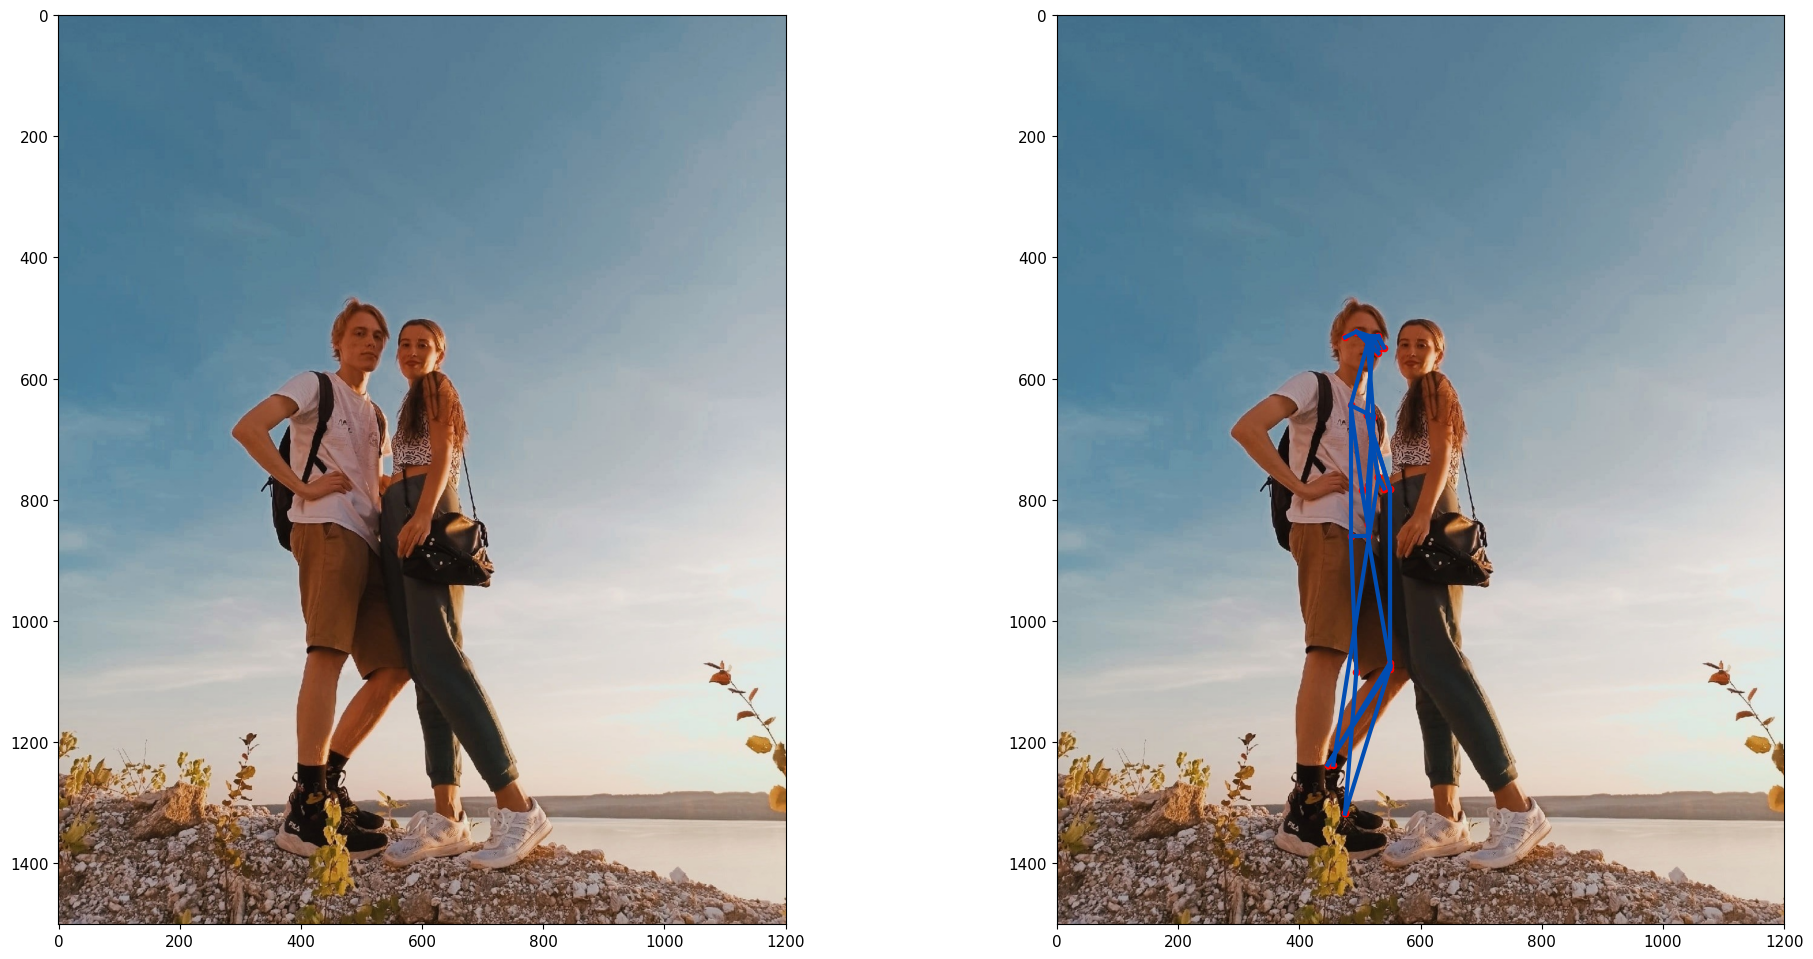

In [16]:
%matplotlib inline
from misc.visualization import joints_dict

def plot_joints(ax, output):
    bones = joints_dict()["coco"]["skeleton"]
    
    for bone in bones:
        x5 = [output[:, bone[0], 1], output[:, bone[1], 1]]
        y5 = [output[:, bone[0], 0], output[:, bone[1], 0]]
        ax.plot(x5, y5, linewidth=3, c=(0,0.3,0.7))
    ax.scatter(joints[:, :, 1], joints[:, :, 0], s=20, c='r')

fig = plt.figure(figsize=(60/2.54, 30/2.54))
ax = fig.add_subplot(121)
ax.imshow(Image.open(image_path))
ax = fig.add_subplot(122)
ax.imshow(Image.open(image_path))
plot_joints(ax, joints)
plt.show()

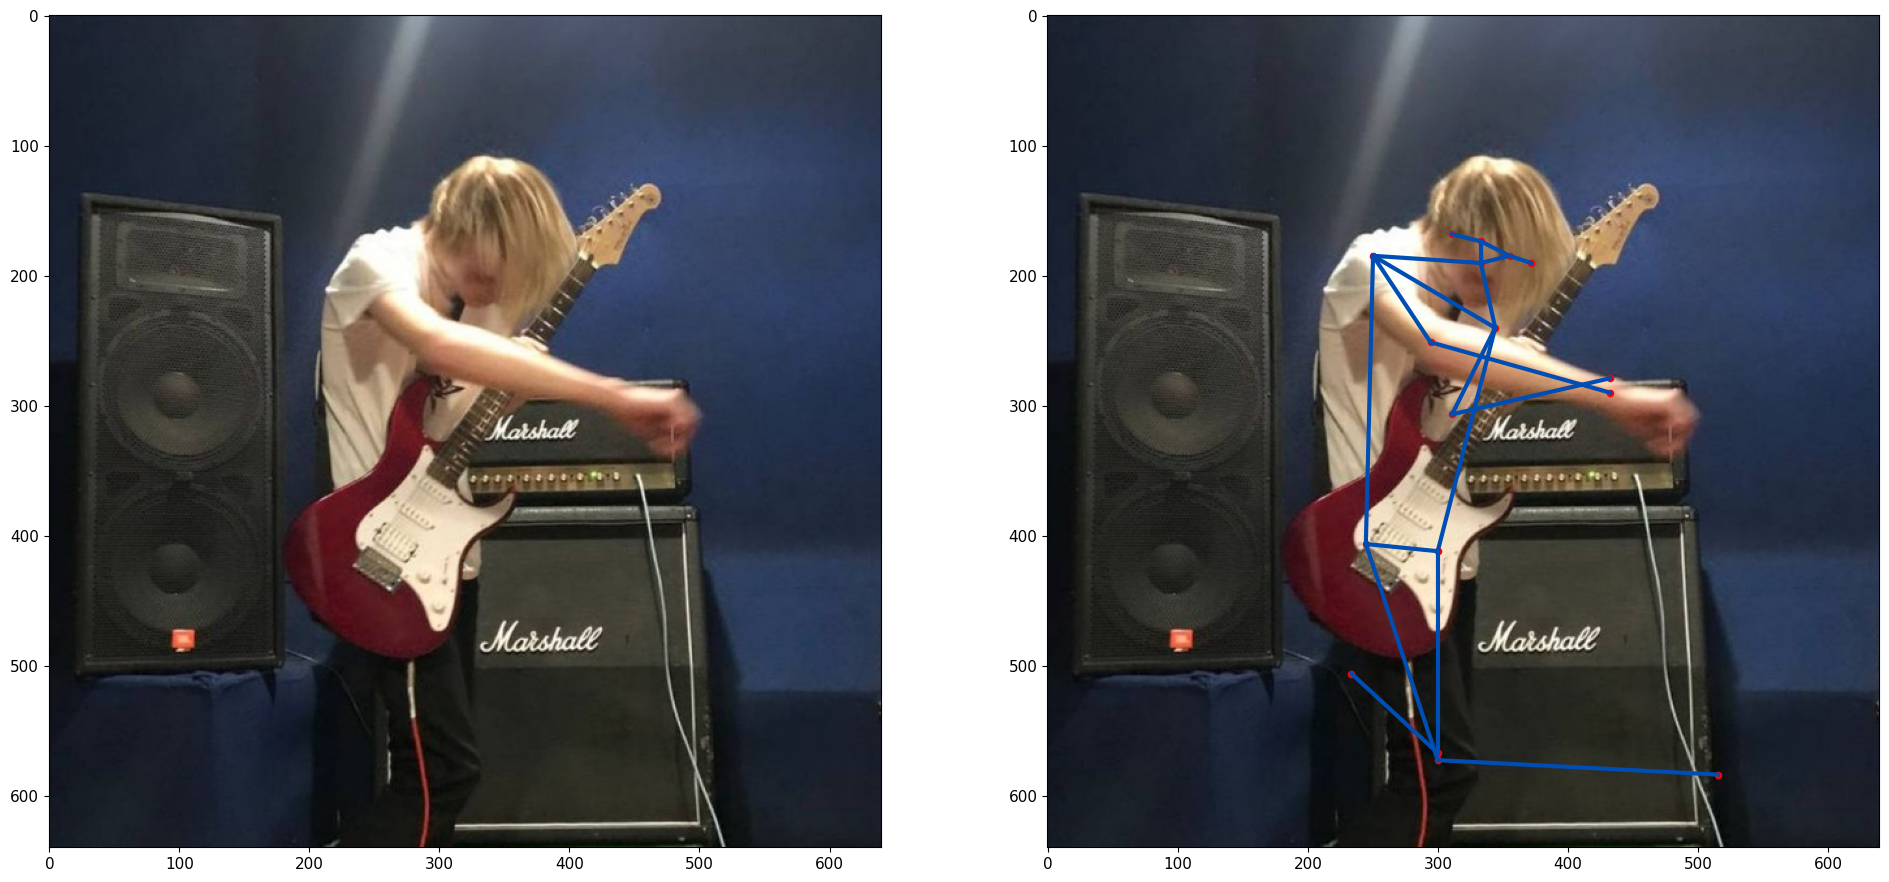

In [18]:
image_path = 'photo_2022-02-04_02-37-59.jpg'
image = io.imread(image_path)
joints = model.predict(image)

%matplotlib inline
from misc.visualization import joints_dict

def plot_joints(ax, output):
    bones = joints_dict()["coco"]["skeleton"]
    
    for bone in bones:
        x5 = [output[:, bone[0], 1], output[:, bone[1], 1]]
        y5 = [output[:, bone[0], 0], output[:, bone[1], 0]]
        ax.plot(x5, y5, linewidth=3, c=(0,0.3,0.7))
    ax.scatter(joints[:, :, 1], joints[:, :, 0], s=20, c='r')

fig = plt.figure(figsize=(60/2.54, 30/2.54))
ax = fig.add_subplot(121)
ax.imshow(Image.open(image_path))
ax = fig.add_subplot(122)
ax.imshow(Image.open(image_path))
plot_joints(ax, joints)
plt.show()